In [1]:
%matplotlib inline
import os
from matplotlib import pylab
import sys
from os.path import dirname
parent_dir = dirname(dirname(os.getcwd()))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','2_hillslope_discharge'))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','1_data_preparation'))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','3_channel_routing'))

from vadoseZone import *
from groundwaterZone import *
from REW import REW
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from datetime import date
import pandas as pd
import numpy as np
import time
import sys


/Users/nathankarst/anaconda/envs/py2k_gis/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
params = {'ET':0, 'emax':0.5, 'leakage':0,'sw':.2,'sfc':0.8,'zr':1000,'storageVZ':0,'n':0.5,'storageGZ':1.0,'discharge':0,'k12':.2,'k1':.3,'b':2.0,'a':.01,'res1':1.0,'res2':1.0}

In [3]:
dt = 1/24.
Tmax = 365
t = np.linspace(0,Tmax,np.ceil(Tmax/dt))
ppt = 10*np.ones(np.shape(t))
pet = np.zeros(np.shape(t))

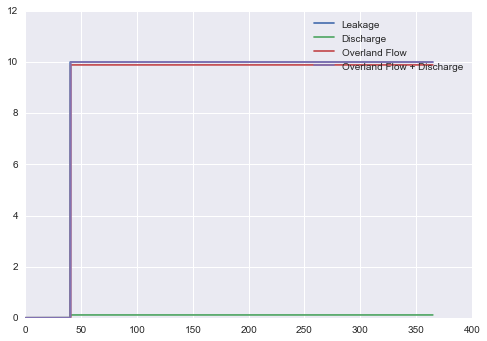

In [13]:
storageVZ       = np.zeros(np.size(t))
storageGZ       = np.zeros(np.size(t))
discharge       = np.zeros(np.size(t))
leakage         = np.zeros(np.size(t))
ET              = np.zeros(np.size(t))
overlandFlow    = np.zeros(np.size(t))

vz = PorporatoVadoseZone(**params)
gz = Melange(**{'storageGZ':0,'a':.01,'b':1.5,'capacity':5})

for i in range(len(t)):
    vz.update(dt,**{'ppt':ppt[i],'pet':pet[i]})
    storageVZ[i] = vz.storageVZ
    leakage[i]      = vz.leakage
    ET[i]           = vz.ET   
    gz.update(dt,**{'leakage':leakage[i]})
    storageGZ[i] = gz.storageGZ
    discharge[i] = gz.discharge
    overlandFlow[i] = gz.overlandFlow
    
plt.plot(t,leakage,label='Leakage')
plt.plot(t,discharge,label='Discharge')
plt.plot(t,overlandFlow,label='Overland Flow')
plt.plot(t,overlandFlow + discharge,label='Overland Flow + Discharge')

plt.legend()

